In [3]:
# Import libraries
import pandas as pd
import numpy as np
from darts import TimeSeries
import plotly.offline as py
import io
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")# for pretty graphs

In [4]:
#Upload training data
from google.colab import files
uploaded    = files.upload()
data        = pd.read_csv(io.BytesIO(uploaded['AirPassengers.csv']))

Saving AirPassengers.csv to AirPassengers.csv


In [6]:
series = TimeSeries.from_dataframe(data, 'Month', '#Passengers')
train, val = series.split_after(pd.Timestamp('19590101'))

ExponentialSmoothing implementation

In [11]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction_exponential = model.predict(len(val))

/usr/local/lib/python3.6/dist-packages/darts/models/exponential_smoothing.py:66: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation



Text(0.5, 0, 'Year')

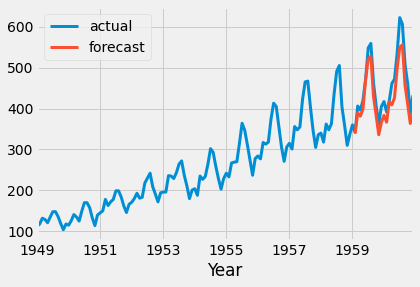

In [12]:
series.plot(label='actual', lw=3)
prediction_exponential.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year')

In [ ]:
ARIMA implementation

In [13]:
from darts.models import AutoARIMA
model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as st

Text(0.5, 0, 'Year')

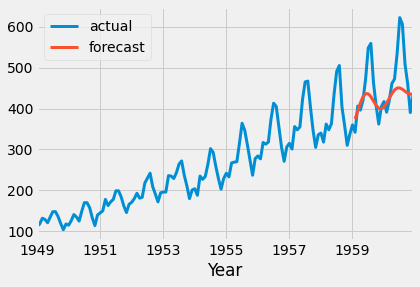

In [14]:
series.plot(label='actual', lw=3)
prediction_aarima.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year')

 Backtesting for comparing two models

In [16]:
from darts.backtesting import backtest_forecasting
from darts.models import Prophet
models = [ExponentialSmoothing(), Prophet()]
backtests = [backtest_forecasting(series,
                                  model,
                                  pd.Timestamp('19550101'),
                                  fcast_horizon_n=3)
             for model in models]

/usr/local/lib/python3.6/dist-packages/darts/models/exponential_smoothing.py:66: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with 

To compute error metrics — mean absolute percentage error(mape):

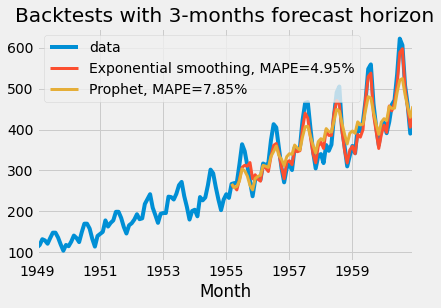

In [17]:
from darts.metrics import mape
series.plot(label='data')
for i, m in enumerate(models):
    err = mape(backtests[i], series)
    backtests[i].plot(lw=3, label='{}, MAPE={:.2f}%'.format(m, err))
plt.title('Backtests with 3-months forecast horizon')
plt.legend()